In [2]:
import pandas as pd
import numpy as np
import os 
import sys
from tqdm import tqdm
import matplotlib.pyplot as plt

In [3]:
fnames = []

for i in range(10):
    fstr = 'test_prediction_split_new_' + str(i+1) + '.csv'
    
    fnames.append(fstr)

In [4]:
!ls 

Evaluate_prediction_111.ipynb	  test_prediction_split_new_4.csv
box_plot_split1.png		  test_prediction_split_new_5.csv
split_1_result.png		  test_prediction_split_new_6.csv
test_prediction_split_new_1.csv   test_prediction_split_new_7.csv
test_prediction_split_new_10.csv  test_prediction_split_new_8.csv
test_prediction_split_new_2.csv   test_prediction_split_new_9.csv
test_prediction_split_new_3.csv


In [5]:
fnames

['test_prediction_split_new_1.csv',
 'test_prediction_split_new_2.csv',
 'test_prediction_split_new_3.csv',
 'test_prediction_split_new_4.csv',
 'test_prediction_split_new_5.csv',
 'test_prediction_split_new_6.csv',
 'test_prediction_split_new_7.csv',
 'test_prediction_split_new_8.csv',
 'test_prediction_split_new_9.csv',
 'test_prediction_split_new_10.csv']

In [6]:
def pred_eval(flname, threshold):
    fread = pd.read_csv(flname, skiprows=1, usecols=[0, 1, 2, 3])
    pred_df = fread.sort_values(by=["Protein_ID", "Compound_ID"])
    pred_df.head()
    
    #threshold = 0.5
    pos_df = pred_df.loc[pred_df.label == 1]
    TP = sum(pos_df.predicted.values>threshold)
    FN = len(pos_df) - TP
    pos_pred = sum(pos_df.predicted.values>threshold)/ len(pos_df)
    p_sc = list(pos_df['predicted'])



    neg_df = pred_df.loc[pred_df.label==0]
    TN = sum(neg_df.predicted.values<=threshold)
    FP = len(neg_df) - TN
    neg_pred = sum(neg_df.predicted.values<=threshold)/ len(neg_df)
    n_sc = list(neg_df['predicted'])
    
    
    return TP, FN, TN, FP, pos_pred, neg_pred, p_sc, n_sc

In [7]:
TP_ls = []
FN_ls = []
TN_ls = []
FP_ls = []
PP_ls = []
NP_ls = []
Pos_score_ls = []
Neg_score_ls = []

for i in tqdm(fnames):
    tp, fn, tn, fp, pp, np, psc, nsc = pred_eval(i, 0.5)
    
    TP_ls.append(tp)
    FN_ls.append(fn)
    TN_ls.append(tn)
    FP_ls.append(fp)
    PP_ls.append(pp)
    NP_ls.append(np)
    Pos_score_ls.append(psc)
    Neg_score_ls.append(nsc)

    print('============================')
    print('TP: ', tp)
    print('FN: ', fn)
    print('TN: ', tn)
    print('FP: ', fp)
    print('PP: ', pp)
    print('NP: ', np)
    

 10%|████▍                                       | 1/10 [00:00<00:06,  1.37it/s]

TP:  904
FN:  206
TN:  125040
FP:  95850
PP:  0.8144144144144144
NP:  0.566073611299742


 20%|████████▊                                   | 2/10 [00:01<00:03,  2.16it/s]

TP:  971
FN:  139
TN:  109440
FP:  110340
PP:  0.8747747747747747
NP:  0.49795249795249796


 30%|█████████████▏                              | 3/10 [00:01<00:02,  2.69it/s]

TP:  912
FN:  198
TN:  121083
FP:  99807
PP:  0.8216216216216217
NP:  0.5481597175064512


 40%|█████████████████▌                          | 4/10 [00:01<00:01,  3.01it/s]

TP:  939
FN:  171
TN:  109941
FP:  109839
PP:  0.845945945945946
NP:  0.5002320502320502


 50%|██████████████████████                      | 5/10 [00:01<00:01,  3.20it/s]

TP:  868
FN:  242
TN:  128535
FP:  87915
PP:  0.781981981981982
NP:  0.5938322938322939


 60%|██████████████████████████▍                 | 6/10 [00:02<00:01,  3.33it/s]

TP:  915
FN:  195
TN:  121904
FP:  95656
PP:  0.8243243243243243
NP:  0.5603235888950174


 70%|██████████████████████████████▊             | 7/10 [00:02<00:01,  2.86it/s]

TP:  870
FN:  240
TN:  121935
FP:  97845
PP:  0.7837837837837838
NP:  0.5548048048048048


 80%|███████████████████████████████████▏        | 8/10 [00:02<00:00,  3.07it/s]

TP:  893
FN:  217
TN:  119782
FP:  101108
PP:  0.8045045045045045
NP:  0.5422699080990538


 90%|███████████████████████████████████████▌    | 9/10 [00:03<00:00,  2.74it/s]

TP:  802
FN:  308
TN:  142500
FP:  79500
PP:  0.7225225225225225
NP:  0.6418918918918919


100%|███████████████████████████████████████████| 10/10 [00:03<00:00,  2.82it/s]

TP:  885
FN:  225
TN:  124475
FP:  95305
PP:  0.7972972972972973
NP:  0.5663618163618164


In [8]:
import numpy as np
NP_ls
np.mean(NP_ls)

0.5571902180875619

In [11]:

print(np.mean(PP_ls))
PP_ls

0.8071171171171171


[0.8144144144144144,
 0.8747747747747747,
 0.8216216216216217,
 0.845945945945946,
 0.781981981981982,
 0.8243243243243243,
 0.7837837837837838,
 0.8045045045045045,
 0.7225225225225225,
 0.7972972972972973]

In [12]:
import seaborn as sns
from scipy import stats
from scipy.stats import ranksums


def stat_anal(p_score, n_score, i_split):
    g = sns.histplot(p_score, color = 'k', stat= 'percent', bins= 20)
    g = sns.histplot(n_score, color = 'r', stat='percent', bins= 20, shrink = 0.7)
    
    fig = g.get_figure()
    fig_name = 'split_' + str(i_split) + '_result.png'
    fig.savefig(fig_name)
    
    test_stat, p_value = ranksums(p_score, n_score, alternative= 'greater')
    
    return p_value
    
    

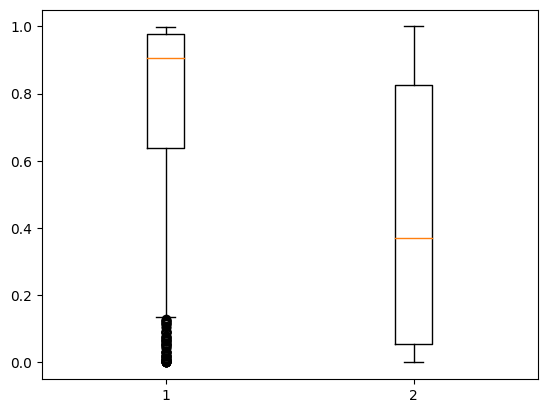

In [15]:
plt.boxplot([Pos_score_ls[0], Neg_score_ls[0]])
plt.savefig('box_plot_split1.png')

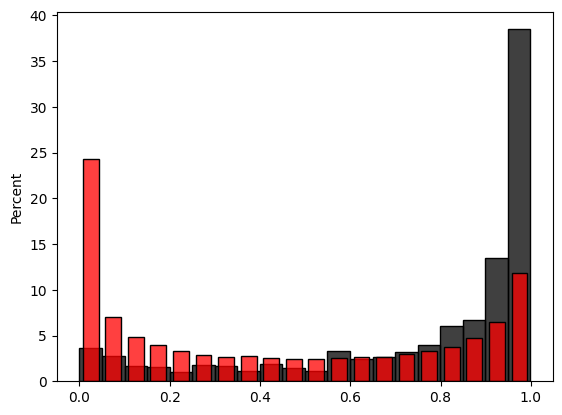

In [15]:
g = sns.histplot(Pos_score_ls[0], color = 'k', stat= 'percent', bins= 20, legend=True)
# g = sns.kdeplot(Pos_score_ls[0], color = 'k', common_norm= True)


g = sns.histplot(Neg_score_ls[0], color = 'r', stat='percent', bins= 20, shrink =0.7, legend = True)
# g = sns.kdeplot(Neg_score_ls[0], color = 'y', common_norm= True)

fig = g.get_figure()
fig.savefig('split_1_result.png')


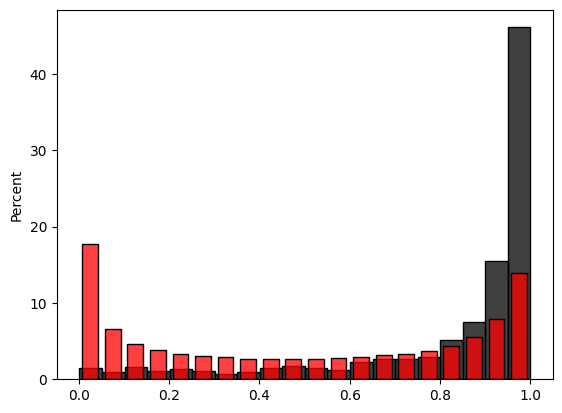

In [16]:
## ============================================ ##
g2 = sns.histplot(Pos_score_ls[1], color = 'k', stat= 'percent', bins= 20, legend=True)
g2 = sns.histplot(Neg_score_ls[1], color = 'r', stat='percent', bins= 20, shrink =0.7, legend = True)

fig2 = g2.get_figure()
fig2.savefig('split_2_result.png')


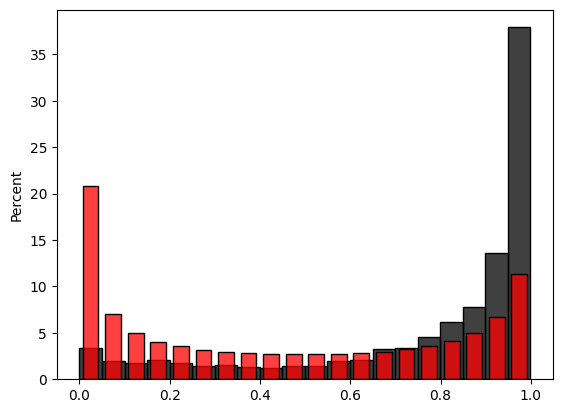

In [17]:

## ============================================ ##
g3 = sns.histplot(Pos_score_ls[2], color = 'k', stat= 'percent', bins= 20, legend=True)
g3 = sns.histplot(Neg_score_ls[2], color = 'r', stat='percent', bins= 20, shrink =0.7, legend = True)

fig3 = g3.get_figure()
fig3.savefig('split_3_result.png')

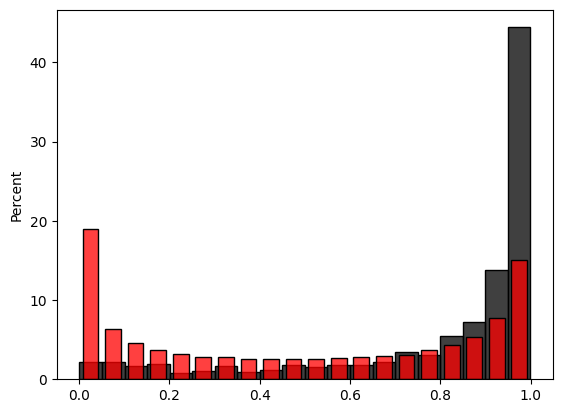

In [18]:

## ============================================ ##
g4 = sns.histplot(Pos_score_ls[3], color = 'k', stat= 'percent', bins= 20, legend=True)
g4 = sns.histplot(Neg_score_ls[3], color = 'r', stat='percent', bins= 20, shrink =0.7, legend = True)

fig4 = g4.get_figure()
fig4.savefig('split_4_result.png')

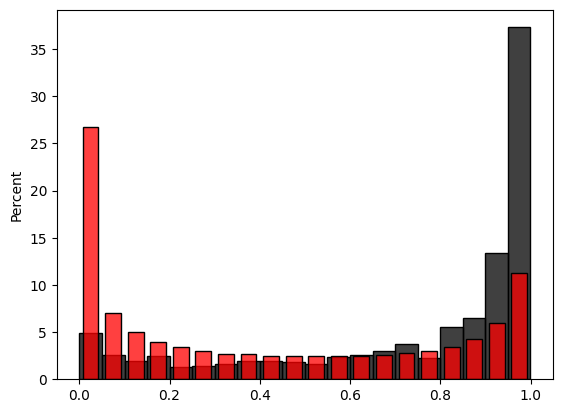

In [19]:
## ============================================ ##
g5 = sns.histplot(Pos_score_ls[4], color = 'k', stat= 'percent', bins= 20, legend=True)
g5 = sns.histplot(Neg_score_ls[4], color = 'r', stat='percent', bins= 20, shrink =0.7, legend = True)

fig5 = g5.get_figure()
fig5.savefig('split_5_result.png')


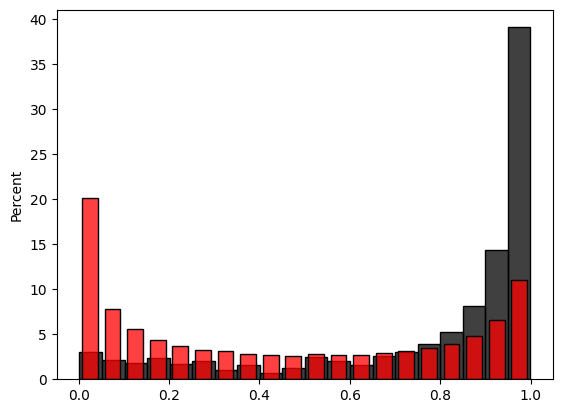

In [20]:
## ============================================ ##
g6 = sns.histplot(Pos_score_ls[5], color = 'k', stat= 'percent', bins= 20, legend=True)
g6 = sns.histplot(Neg_score_ls[5], color = 'r', stat='percent', bins= 20, shrink =0.7, legend = True)

fig6 = g6.get_figure()
fig6.savefig('split_6_result.png')

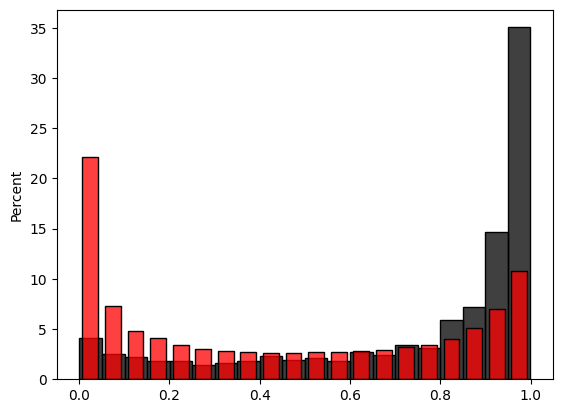

In [21]:

## ============================================ ##
g7 = sns.histplot(Pos_score_ls[6], color = 'k', stat= 'percent', bins= 20, legend=True)
g7 = sns.histplot(Neg_score_ls[6], color = 'r', stat='percent', bins= 20, shrink =0.7, legend = True)

fig7 = g7.get_figure()
fig7.savefig('split_7_result.png')

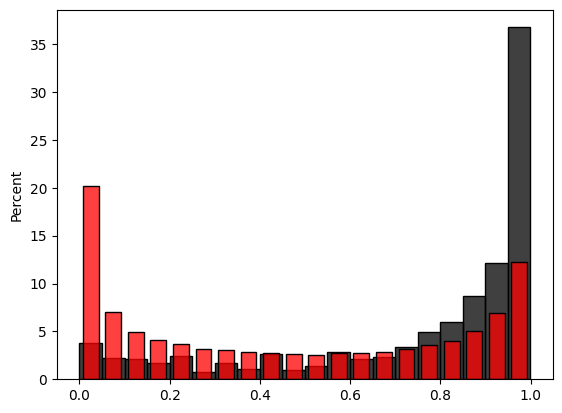

In [22]:



## ============================================ ##
g8 = sns.histplot(Pos_score_ls[7], color = 'k', stat= 'percent', bins= 20, legend=True)
g8 = sns.histplot(Neg_score_ls[7], color = 'r', stat='percent', bins= 20, shrink =0.7, legend = True)

fig8 = g8.get_figure()
fig8.savefig('split_8_result.png')

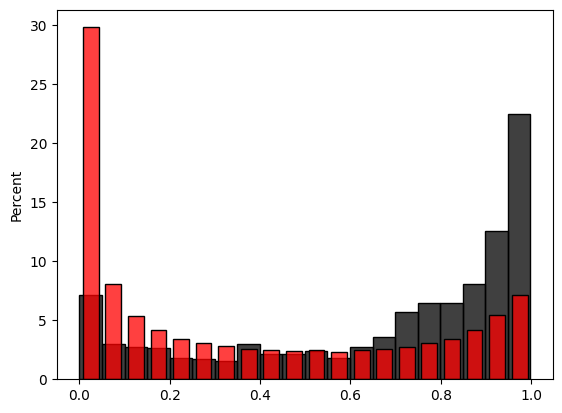

In [23]:

## ============================================ ##
g9 = sns.histplot(Pos_score_ls[8], color = 'k', stat= 'percent', bins= 20, legend=True)
g9 = sns.histplot(Neg_score_ls[8], color = 'r', stat='percent', bins= 20, shrink =0.7, legend = True)

fig9 = g9.get_figure()
fig9.savefig('split_9_result.png')

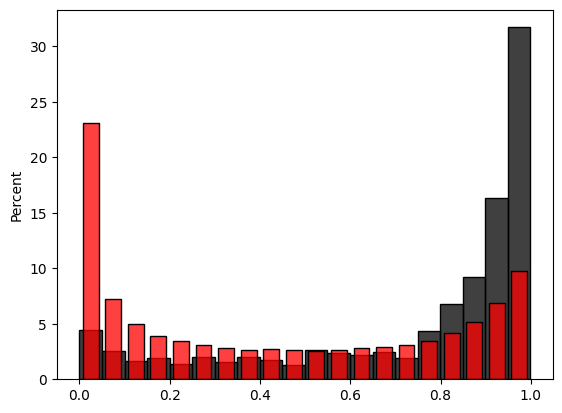

In [24]:

## ============================================ ##
g10 = sns.histplot(Pos_score_ls[9], color = 'k', stat= 'percent', bins= 20, legend=True)
g10 = sns.histplot(Neg_score_ls[9], color = 'r', stat='percent', bins= 20, shrink =0.7, legend = True)

fig10 = g10.get_figure()
fig10.savefig('split_10_result.png')